In [4]:
# Optimization for Machine Learning
# Problem: projected gradient descent for SVM

%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pegasos import *
from cyclic_coordinate_descent import *
from random_coordinate_descent import *
from utils import *


from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
import os, struct
from array import array
from SMO import SMO
from RSMO import RSMO

np.random.seed(1337)

kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 24}
matplotlib.rc('font', **font)


### Load mnist training and validation images. Plot examples from both sets and show their corresponding labels as verification.

In [5]:
# mnist load images
train_imgs_dir = './dataset/mnist/train-images.idx3-ubyte'
train_labels_dir = './dataset/mnist/train-labels.idx1-ubyte'
val_imgs_dir = './dataset/mnist/t10k-images.idx3-ubyte'
val_labels_dir = './dataset/mnist/t10k-labels.idx1-ubyte'
train_imgs, train_labels = mnist_data_loader(train_imgs_dir, train_labels_dir)
print("mnist: number of training examples", train_imgs.shape[0])

val_imgs, val_labels = mnist_data_loader(val_imgs_dir, val_labels_dir)
print("mnist: number of validation examples", val_imgs.shape[0])
HEIGHT = 28
WIDTH = 28

# Reshape images to vectors
train_vectors = train_imgs.reshape(-1, HEIGHT * WIDTH)
val_vectors = val_imgs.reshape(-1, HEIGHT * WIDTH)

mnist: number of training examples 11769
mnist: number of validation examples 1932


## Plot Functions

In [6]:
# initialize w, lambda
num_examples, num_features = train_vectors.shape

def error_plot(w, _lambda, img_vectors, labels, algorithm, dilate=1, yscale='log'):
    """plot errors"""
    error_list = cal_objective_dilate(w, _lambda, img_vectors, labels, dilate)
    print(algorithm+" error:", error_list[-1])
    plt.xlabel('Step')
    plt.ylabel('Error')
#     plt.yscale(yscale)
    num_iters = len(error_list)
    plt.plot(np.linspace(0, num_iters*dilate, num=num_iters), error_list, **kwargs)

def cal_objective_dilate(w, _lambda, img_vectors, labels, dilate=1):
    num_iters = len(w)
    return [objective(x, _lambda, img_vectors, labels) \
                                for x in w[0:num_iters:dilate]]

def acc_plot(w, img_vectors, labels, algorithm, dilate=1):
    """plot accuracies"""
    acc_list = cal_acc_dilate(w, img_vectors, labels, dilate)
    print(algorithm+" acc:", acc_list[-1])
    plt.xlabel('Step')
    plt.ylabel('Acc')
    num_iters = len(acc_list)
    plt.plot(np.linspace(0, num_iters*dilate, num=num_iters), acc_list, **kwargs)

def cal_acc_dilate(w, img_vectors, labels, dilate=1):
    num_iters = len(w)
    return [compute_accuracy(x, img_vectors, labels) for x in w[0:num_iters:dilate]]

## Training error

In [7]:
def average_weight(w):
    w_sum = np.zeros([num_features,1])
    w_average = []
    for i in range(0,len(w)):
        w_sum += w[i]
        w_average.append(w_sum/(i+1))
    return w_average

def set_pegasos_params():
    w0 = np.zeros([num_features,1])
    _lambda = 1
    num_steps = 3000
    return _lambda, num_steps, w0

def set_primal_cyclic_cd_params():
    w0 = np.zeros([num_features,1])
    _lambda = 1
    num_steps = 4
    t_bias = 10
    return _lambda, num_steps, w0, t_bias

def set_primal_random_cd_params():
    w0 = np.zeros([num_features,1])
    _lambda = 1
    num_steps = 4
    t_bias = 10
    return _lambda, num_steps, w0, t_bias


In [10]:
# SMO descend with C=100.0
smo_model_100 = SMO(max_iter=1, kernel_type='linear', C=100.0, epsilon=0.001)
smo_model_100.fit(train_vectors, train_labels)

# SMO descend with C=10.0
smo_model_10 = SMO(max_iter=1, kernel_type='linear', C=10.0, epsilon=0.001)
smo_model_10.fit(train_vectors, train_labels)

# SMO descend with C=1.0
smo_model_1 = SMO(max_iter=1, kernel_type='linear', C=1.0, epsilon=0.001)
smo_model_1.fit(train_vectors, train_labels)

# SMO descend with C=0.1
smo_model_01 = SMO(max_iter=1, kernel_type='linear', C=0.1, epsilon=0.001)
smo_model_01.fit(train_vectors, train_labels)

# SMO descend with C=0.01
smo_model_001 = SMO(max_iter=1, kernel_type='linear', C=0.01, epsilon=0.001)
smo_model_001.fit(train_vectors, train_labels)

# SMO descend with C=1/n
smo_model_0n = SMO(max_iter=1, kernel_type='linear', C=1.0 / train_vectors.shape[0], epsilon=0.001)
smo_model_0n.fit(train_vectors, train_labels)

SMO training start
SMO training ends....
Iteration number exceeded the max of 1 iterations
using time : 542.6186530590057
SMO training start
SMO training ends....
Iteration number exceeded the max of 1 iterations
using time : 541.1609675884247
SMO training start
SMO training ends....


(array([[-0.4541286 , -0.4541286 , -0.4541286 , ..., -0.4541286 ,
         -0.4541286 , -0.4541286 ],
        [-0.4407392 , -0.4407392 , -0.4407392 , ..., -0.4407392 ,
         -0.4407392 , -0.4407392 ],
        [-0.45760015, -0.45760015, -0.45760015, ..., -0.45760015,
         -0.45760015, -0.45760015],
        ...,
        [-0.3771063 , -0.3771063 , -0.3771063 , ..., -0.3771063 ,
         -0.3771063 , -0.3771063 ],
        [-0.39203656, -0.39203656, -0.39203656, ..., -0.39203656,
         -0.39203656, -0.39203656],
        [-0.6214801 , -0.6214801 , -0.6214801 , ..., -0.6214801 ,
         -0.6214801 , -0.6214801 ]], dtype=float32), 1)

SMO error: 0.1141519655831446
SMO error: 0.12812620809074993
SMO error: 0.7377224909789335


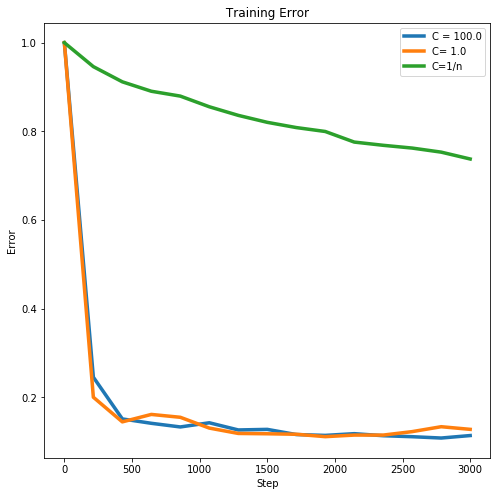

In [12]:
# training error plot
plot_dilation = 200
plt.figure(figsize=(8, 8))
plot_iters = 3000

error_plot(smo_model_100.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 100.0', plot_dilation)
error_plot(smo_model_10.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 10.0', plot_dilation)
error_plot(smo_model_1.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C= 1.0', plot_dilation)
error_plot(smo_model_01.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 0.1', plot_dilation)
error_plot(smo_model_001.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 0.01', plot_dilation)
error_plot(smo_model_0n.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 1/n', plot_dilation)

plt.title(' Training Error ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

In [2]:
# training acc plot
plt.figure(figsize=(8, 8))
acc_plot(smo_model_100.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 100.0', plot_dilation)
acc_plot(smo_model_10.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 10.0', plot_dilation)
acc_plot(smo_model_1.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C= 1.0', plot_dilation)
acc_plot(smo_model_01.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 0.1', plot_dilation)
acc_plot(smo_model_001.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 0.01', plot_dilation)
acc_plot(smo_model_0n.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 1/n', plot_dilation)

plt.title(' Training Acc ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

NameError: name 'plt' is not defined

In [3]:
# test error plot
plt.figure(figsize=(8, 8))
error_plot(smo_model_100.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_10.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_1.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_01.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_001.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_0n.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)

plt.title(' Testing Error ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

NameError: name 'plt' is not defined

In [ ]:
# test acc plot
plt.figure(figsize=(8, 8))
acc_plot(smo_model_100.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_10.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_1.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_01.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_001.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_0n.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)

plt.title(' Testing Acc ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

In [ ]:
# Cifar
folder = 'dataset/cifar/'
train_vectors, train_labels, val_vectors, val_labels, label_names = get_cifar10(folder)
print(train_vectors.shape, train_labels.shape, val_vectors.shape, val_labels.shape)
num_examples, num_features = train_vectors.shape

In [ ]:
# SMO descend with C=100.0
smo_model_100 = SMO(max_iter=1, kernel_type='linear', C=100.0, epsilon=0.001)
smo_model_100.fit(train_vectors, train_labels)

# SMO descend with C=10.0
smo_model_10 = SMO(max_iter=1, kernel_type='linear', C=10.0, epsilon=0.001)
smo_model_10.fit(train_vectors, train_labels)

# SMO descend with C=1.0
smo_model_1 = SMO(max_iter=1, kernel_type='linear', C=1.0, epsilon=0.001)
smo_model_1.fit(train_vectors, train_labels)

# SMO descend with C=0.1
smo_model_01 = SMO(max_iter=1, kernel_type='linear', C=0.1, epsilon=0.001)
smo_model_01.fit(train_vectors, train_labels)

# SMO descend with C=0.01
smo_model_001 = SMO(max_iter=1, kernel_type='linear', C=0.01, epsilon=0.001)
smo_model_001.fit(train_vectors, train_labels)

# SMO descend with C=1/n
smo_model_0n = SMO(max_iter=1, kernel_type='linear', C=1.0 / train_vectors.shape[0], epsilon=0.001)
smo_model_0n.fit(train_vectors, train_labels)

In [ ]:
# training error plot
plot_dilation = 200
plt.figure(figsize=(8, 8))
plot_iters = 3000

error_plot(smo_model_100.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_10.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_1.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_01.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_001.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_0n.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)

plt.title(' Training Error ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

In [ ]:
# training acc plot
plt.figure(figsize=(8, 8))
acc_plot(smo_model_100.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_10.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_1.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_01.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_001.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_0n.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)

plt.title(' Training Acc ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

In [ ]:
# test error plot
plt.figure(figsize=(8, 8))
error_plot(smo_model_100.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_10.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_1.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_01.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_001.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_0n.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)

plt.title(' Testing Error ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

In [ ]:
# test acc plot
plt.figure(figsize=(8, 8))
acc_plot(smo_model_100.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_10.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_1.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_01.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_001.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_0n.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)

plt.title(' Testing Acc ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])